In [105]:
import os
import pandas as pd
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [106]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [107]:
#create a function to make it easier
def articles_to_df (articles):
    data = []
    for article in articles["articles"]:
            sentiment = analyzer.polarity_scores(article["content"])
            data.append({
                "text": article["content"],
                "compound": sentiment["compound"],
                "positive": sentiment["pos"],
                "negative": sentiment["neg"],
                "neutral": sentiment["neu"]           
            })       
    df = pd.DataFrame(data)
    return df

In [108]:
# Read your api key environment variable
api_key = '05b9d07d96d54c548c3a17e79e582bbd'

In [109]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [110]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin", 
                                          language="en", 
                                          sort_by='relevancy',
                                          sources='bbc-news,the-verge',
                                          domains='bbc.co.uk,techcrunch.com',
                                         )

In [111]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="ethereum", 
                                           language="en", 
                                           sort_by='relevancy',
                                           sources='bbc-news,the-verge',
                                           domains='bbc.co.uk,techcrunch.com'
                                          )

In [112]:
# Create the Bitcoin sentiment scores DataFrame
bit_df = articles_to_df(bitcoin_articles)

bit_df.head()

,compound,negative,neutral,positive,text
0,-0.7845,0.154,0.846,0.000,New allegations against a bitcoin developer sp...
1,-0.7964,0.183,0.786,0.032,Image copyrightGetty Images\r\nA Russian man h...
2,0.3400,0.000,0.946,0.054,The price of Bitcoin and other cryptocurrencie...
3,-0.4767,0.069,0.931,0.000,Image copyrightGetty ImagesImage caption\r\n T...
4,-0.5106,0.144,0.791,0.065,Image copyrightSOPA Images/GettyImage caption\...


In [113]:
# Create the ethereum sentiment scores DataFrame
eth_df = articles_to_df(ethereum_articles)

eth_df.head()

,compound,negative,neutral,positive,text
0,-0.5106,0.144,0.791,0.065,Image copyrightSOPA Images/GettyImage caption\...
1,0.0000,0.000,1.000,0.000,"New Vector, a European startup founded in 2017..."
2,0.0000,0.000,1.000,0.000,"The Exodus 1S is available to order now, but n..."
3,0.6901,0.029,0.825,0.146,The Ethereum community is hard at work on Ethe...


In [114]:
# Describe the Bitcoin Sentiment
bit_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.019005,0.068000,0.869632,0.062368
std,0.542300,0.068542,0.083674,0.062113
min,-0.859100,0.000000,0.657000,0.000000
25%,-0.473800,0.014500,0.824500,0.000000
50%,0.296000,0.044000,0.876000,0.060000
75%,0.381550,0.117500,0.932000,0.102500
max,0.784500,0.209000,1.000000,0.183000


In [115]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,4.000000,4.000000,4.000000,4.000000
mean,0.044875,0.043250,0.904000,0.052750
std,0.492915,0.068544,0.111717,0.069308
min,-0.510600,0.000000,0.791000,0.000000
25%,-0.127650,0.000000,0.816500,0.000000
50%,0.000000,0.014500,0.912500,0.032500
75%,0.172525,0.057750,1.000000,0.085250
max,0.690100,0.144000,1.000000,0.146000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [116]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [117]:
# Expand the default stop words list if necessary
sw = set(stopwords.words('english'))
sw_addon = {'char', 'chars', 'fucking'}
regex = re.compile("[^a-zA-Z ]")
lemmatizer = WordNetLemmatizer()

bit_text = ""
for article in bitcoin_articles["articles"]:
    bit_text = bit_text + " " + article["content"]
    
eth_text = ""
for article in ethereum_articles["articles"]:
    eth_text = eth_text + " " + article["content"]   

In [118]:
# Complete the tokenizer function

def tokenizer(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output


In [119]:
# Create a new tokens column for bitcoin
bit_df["tokens"] = bit_df["text"].apply(lambda x: tokenizer(str(x)))
bit_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.7845,0.154,0.846,0.000,New allegations against a bitcoin developer sp...,"[new, allegation, bitcoin, developer, spurred,..."
1,-0.7964,0.183,0.786,0.032,Image copyrightGetty Images\r\nA Russian man h...,"[image, copyrightgetty, imagesa, russian, man,..."
2,0.3400,0.000,0.946,0.054,The price of Bitcoin and other cryptocurrencie...,"[price, bitcoin, cryptocurrencies, tanked, tod..."
3,-0.4767,0.069,0.931,0.000,Image copyrightGetty ImagesImage caption\r\n T...,"[image, copyrightgetty, imagesimage, caption, ..."
4,-0.5106,0.144,0.791,0.065,Image copyrightSOPA Images/GettyImage caption\...,"[image, copyrightsopa, imagesgettyimage, capti..."


In [120]:
# Create a new tokens column for ethereum
eth_df["tokens"] = eth_df["text"].apply(lambda x: tokenizer(str(x)))
eth_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.5106,0.144,0.791,0.065,Image copyrightSOPA Images/GettyImage caption\...,"[image, copyrightsopa, imagesgettyimage, capti..."
1,0.0000,0.000,1.000,0.000,"New Vector, a European startup founded in 2017...","[new, vector, european, startup, founded, crea..."
2,0.0000,0.000,1.000,0.000,"The Exodus 1S is available to order now, but n...","[exodus, available, order, usimage, htchtc, ha..."
3,0.6901,0.029,0.825,0.146,The Ethereum community is hard at work on Ethe...,"[ethereum, community, hard, work, ethereum, ne..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [121]:
from collections import Counter
from nltk import ngrams

In [122]:
# Generate the Bitcoin N-grams where N=2
bit_list = []
bit_list = tokenizer(bit_text)
bit_bigrams = Counter(ngrams(bit_list, n=2))
dict(bit_bigrams.most_common(10))

{('char', 'image'): 6,
 ('image', 'copyrightgetty'): 3,
 ('digital', 'currency'): 2,
 ('copyrightgetty', 'imagesimage'): 2,
 ('imagesimage', 'caption'): 2,
 ('world', 'largest'): 2,
 ('amelia', 'holowaty'): 2,
 ('new', 'allegation'): 1,
 ('allegation', 'bitcoin'): 1,
 ('bitcoin', 'developer'): 1}

In [123]:
# Generate the Ethereum N-grams where N=2
eth_list = []
eth_list = tokenizer(eth_text)
eth_bigrams = Counter(ngrams(eth_list, n=2))
dict(bit_bigrams.most_common(10))

{('char', 'image'): 6,
 ('image', 'copyrightgetty'): 3,
 ('digital', 'currency'): 2,
 ('copyrightgetty', 'imagesimage'): 2,
 ('imagesimage', 'caption'): 2,
 ('world', 'largest'): 2,
 ('amelia', 'holowaty'): 2,
 ('new', 'allegation'): 1,
 ('allegation', 'bitcoin'): 1,
 ('bitcoin', 'developer'): 1}

In [124]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [125]:
# Get the top 10 words for Bitcoin
token_count(bit_list)

[('char', 19),
 ('ha', 10),
 ('image', 6),
 ('one', 5),
 ('company', 5),
 ('new', 4),
 ('bitcoin', 4),
 ('say', 4),
 ('caption', 4),
 ('cryptocurrency', 4)]

In [126]:
# Get the top 10 words for Ethereum
token_count(eth_list)

[('ha', 4),
 ('char', 4),
 ('exodus', 4),
 ('ethereum', 3),
 ('police', 2),
 ('raised', 2),
 ('cryptocurrency', 2),
 ('new', 2),
 ('called', 2),
 ('messaging', 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

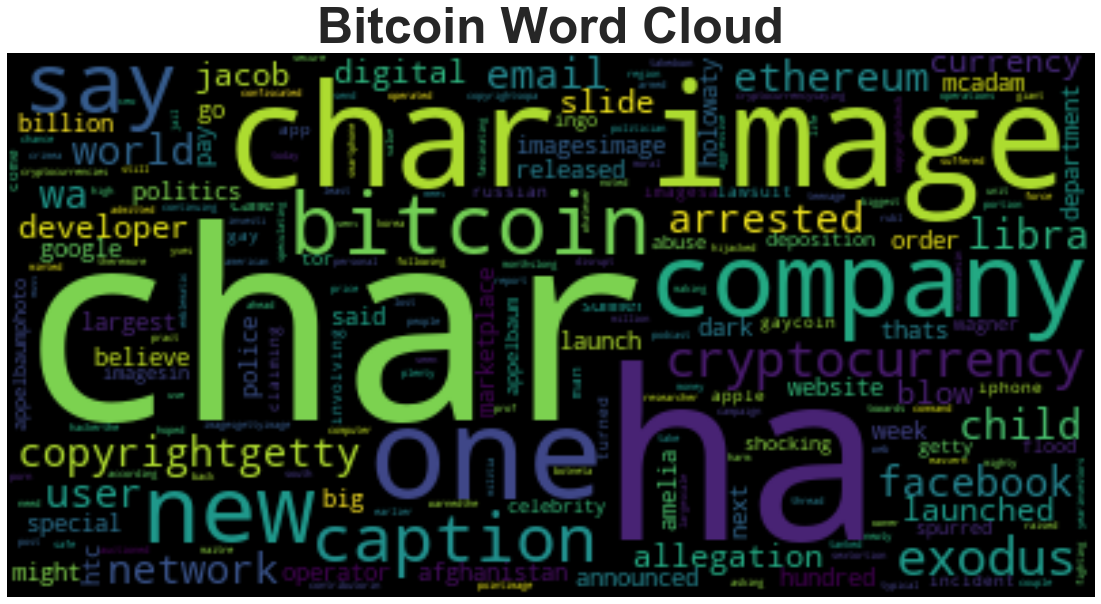

In [128]:
# Generate the Bitcoin word cloud

def word_cloud(list, topic):
    cloud = ' '.join(list)
    wc = WordCloud().generate(cloud)
    plt.axis('off')
    plt.title(f"{topic} Word Cloud", fontsize=50, fontweight='bold')
    plt.imshow(wc, interpolation='bilinear')
    return

word_cloud(bit_list, "Bitcoin")

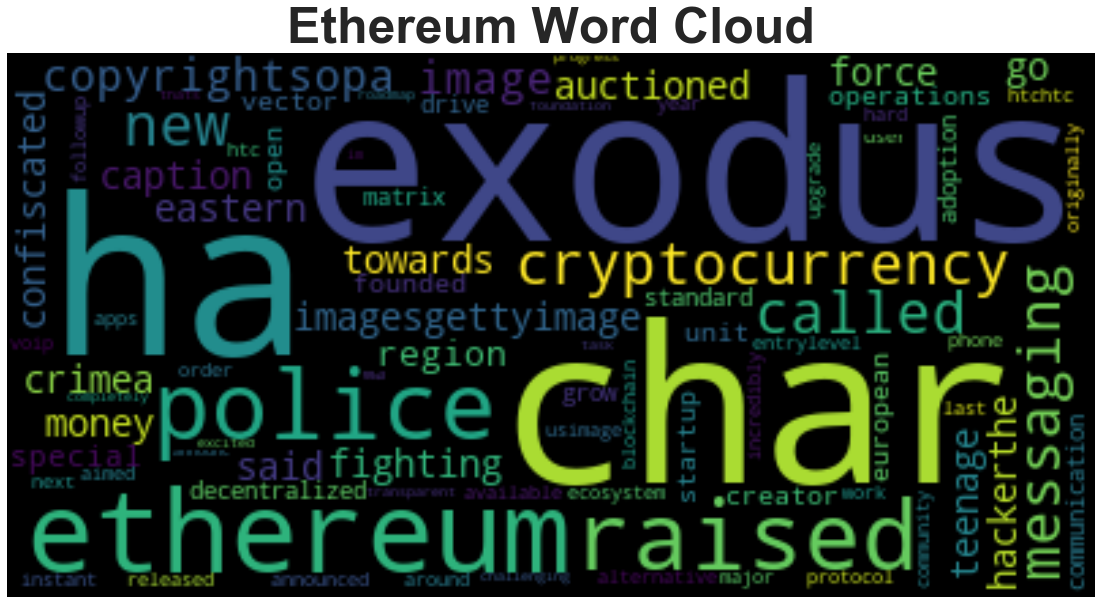

In [129]:
# Generate the Ethereum word cloud
word_cloud(eth_list, "Ethereum")

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [130]:
import spacy
from spacy import displacy

In [131]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [132]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [133]:
# Concatenate all of the bitcoin text together
bit_text

' New allegations against a bitcoin developer spurred a deposition from Jacob Appelbaum\r\nPhoto by Ingo Wagner / Getty Images\r\nIn the summer of 2016, a flood of abuse allegations came out against celebrity Tor developer Jacob Appelbaum, a shocking blow to one of… [+6852 chars] Image copyrightGetty Images\r\nA Russian man has launched a lawsuit against Apple, claiming an iPhone app turned him gay. \r\nHe says this comes after an incident involving GayCoin crypto-currency.\r\nSaying he suffered moral harm, he is asking for one million rubl… [+1683 chars] The price of Bitcoin and other cryptocurrencies tanked today, continuing a months-long slide that has seen the value of the digital currency slide by more than $2,000 from highs of above $10,000 earlier in the year.\r\nInvestors are still speculating about the … [+2743 chars] Image copyrightGetty ImagesImage caption\r\n The website was operated from South Korea, and its owner is now in jail there\r\nMore than 300 people have been arre

In [134]:
# Run the NER processor on all of the text
bit_NER = nlp(bit_text)
# Add a title to the document
bit_NER.user_data["title"] = "Bitcoin"

In [135]:
# Render the visualization
displacy.render(bit_NER, style='ent')

In [136]:
# List all Entities
for each in bit_NER.ents:
    print(each.text, each.label_)

Jacob Appelbaum PERSON
Ingo Wagner / Getty Images ORG
the summer of 2016 DATE
Tor ORG
Jacob Appelbaum PERSON
Russian NORP
Apple ORG
iPhone ORG
GayCoin ORG
one million CARDINAL
Bitcoin PERSON
today DATE
months-long DATE
more than $2,000 MONEY
above $10,000 MONEY
the year DATE
South Korea GPE
More than 300 CARDINAL
one CARDINAL
240,000 CARDINAL
2012 DATE
This American Life ORG
Afghanistan GPE
Afghanistan GPE
HTC ORG
Yves Maitre PERSON
Disrupt NORP
a couple of weeks DATE
PointImage ORG
one CARDINAL
more than 450,000 CARDINAL
Facebook PRODUCT
Libra GPE
2020 DATE
Facebook ORG
Libra PERSON
Meet Moon PERSON
three CARDINAL
Amazon ORG
the Lightning Network ORG
Litecoin FAC
Ether PERSON
US GPE
HTC ORG
HTC ORG
the HTC Exodus 1S LAW
$699 Exodus MONEY
last year DATE
Exodus ORG
Jen McAdam PERSON
Glasgow PERSON
OneCoin CARDINAL
Geneva GPE
next week DATE
June 18th DATE
billions CARDINAL
tens of billions MONEY
United States GPE
hundreds CARDINAL
More than 300 CARDINAL
Justice Department ORG
Holowaty Kr

---

## Ethereum NER

In [137]:
# Concatenate all of the bitcoin text together
eth_text

" Image copyrightSOPA Images/GettyImage caption\r\n Police said the money raised would go towards fighting crime\r\nA police force has auctioned off more than £240,000 of cryptocurrency confiscated from a teenage hacker.\r\nThe Eastern Region Special Operation's Unit… [+1449 chars] New Vector, a European startup founded in 2017 by the creators of an open, decentralized communications standard called Matrix to drive adoption and grow an ecosystem around an alternative messaging protocol for instant messaging and VoIP apps, has raised an … [+10315 chars] The Exodus 1S is available to order now, but not in the US\r\nImage: HTC\r\nHTC has announced a new entry-level phone aimed at cryptocurrency users called the HTC Exodus 1S, a followup to the $699 Exodus 1 that was originally released last year. The Exodus 1S is … [+1908 chars] The Ethereum community is hard at work on Ethereum 2.0, the next major upgrade of its blockchain. It is an incredibly challenging task, and the Ethereum Foundatio

In [138]:
# Run the NER processor on all of the text
eth_NER = nlp(eth_text)
# Add a title to the document
eth_NER.user_data["title"] = "Ethereum"

In [139]:
# Render the visualization
displacy.render(eth_NER, style='ent')

In [140]:
# List all Entities
for each in eth_NER.ents:
    print(each.text, each.label_)

240,000 CARDINAL
European NORP
2017 DATE
VoIP PRODUCT
US GPE
HTC ORG
HTC ORG
the HTC Exodus 1S LAW
$699 Exodus MONEY
last year DATE
Exodus ORG
Ethereum 2.0 LAW
the Ethereum Foundation ORG
